# Assignment 3 - Supervised Learning

## *YOUR FULL NAME HERE*
Netid:  *Your netid here*

## 1
### [40 points] From theory to practice: classification through logistic regression

#### Introduction
For this problem you will derive, implement through gradient descent, and test the performance of a logistic regression classifier for a binary classification problem.

In this case, we'll assume our logistic regression problem will be applied to a two dimensional feature space. Our logistic regression model is:

$$f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

where the sigmoid function is defined as $\sigma(x) = \frac{e^x}{1-e^x}$. Also, since this is a two-dimensional problem, we define $\mathbf{w}^T \mathbf{x}_i = w_0 x_{i,0} + w_1 x_{i,1} + w_2 x_{i,2}$ and here, $x_{i,0} \triangleq 1$

As in class, we will interpret the response of the logistic regression classifier to be the likelihood of the data given the model. For one sample, $(y_i, \mathbf{x_i})$, this is given as:

$$P(Y=y_i|X=x_i) = f(\mathbf{x}_i,\mathbf{w})=\sigma(\mathbf{w}^T \mathbf{x}_i)$$

#### Find the cost function that we can use to choose the model parameters, $\mathbf{w}$, that best fit the training data.

**(a)** What is the likelihood function of the data that we will wish to maximize?

**(b)** Since a logarithm is a monotonic function, maximizing the $f(x)$ is equivalent to maximizing $\ln [f(x)]$. Express part (a) as a cost function of the model parameters, $C(\mathbf{w})$, that is the negative of the logarithm of (a).

**(c)** Calculate the gradient of the cost function with respect to the model parameters $\nabla_{\mathbf{w}}C(\mathbf{w})$. Express this in terms of the partial derivatives of the cost function with respect to each of the parameters, e.g. $\nabla_{\mathbf{w}}C(\mathbf{w}) = \left[\frac{\partial C}{\partial w_0}, \frac{\partial C}{\partial w_1}, \frac{\partial C}{\partial w_2}\right]$.

**(d)** Write out the gradient descent update equation, assuming $\eta$ represents the learning rate.

#### Prepare and plot your data

**(e)** Load the data and scatter plot the data by class. In the data folder in the same directory of this notebook, you'll find the data in `A3_Q1_data.csv`. This file contains the binary class labels, $y$, and the features $x_1$ and $x_2$.  Comment on the data: do the data appear separable? Why might logistic regression be a good choice for these data or not?

**(f)** Do the data require any preprocessing due to missing values, scale differences, etc? If so, how did you remediate this?

#### Implement gradient descent and your logistic regression algorithm

**(g)** Create a function or class to implement your logistic regression. It should take as inputs the model parameters, $\mathbf{w}=\left[w_0,w_1,w_2\right]$, and output the class confidence probabilities, $P(Y=y_i|X=x_i)$.

**(h)** Create a function that computes the cost function $C(\mathbf{w})$ for a given dataset and corresponding class labels.

**(i)** Create a function or class to run gradient descent on your training data. We'll refer to this as "batch" gradient descent since it takes into account the gradient based on all our data at each iteration (or "epoch") of the algorithm. Divide your data into a training and testing set where the test set accounts for 30 percent of the data and the test set the remaining 70 percent. In doing this we'll need to make some assumptions / experiment with the following:
1. The initialization of the algorithm - what should you initialize the model parameters to? For this, randomly initialize the weights to a different values between 0 and 1.
2. The learning rate - how slow/fast should the algorithm proceed in the direction opposite the gradient? This you will experiment with.
3. Stopping criteria - when should the algorithm be finished searching for the optimum? Set this to be when the cost function changes by no more than $10^{-6}$ between iterations. Since we have a weight vector, you can compute this by seeing if the L2 norm of the weight vector changes by no more than $10^{-6}$ between iterations.

**(j)** At each step in the gradient descent algorithm it will produce updated parameter estimates. For each set of estimates, calculate the cost function for both the training and the test data. 

**(k)** Show this process for different learning rates by plotting the resulting cost as a function of iteration (or "epoch"). What is the impact that each parameter has on the process and the results? What choices did you make in your chosen approach and why? Use the parameter you choose here for the learning rate for the remainder of this question.

#### Test your model performance through cross validation

**(l)** Test the performance of your trained classifier using K-folds cross validation (while this can be done manually, the scikit-learn package [StratifiedKFolds](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html#sklearn.model_selection.StratifiedKFold) may be helpful). Produce Receiver Operating Characteristic Curves (ROC curves) of your cross validated performance. 

**(m)** Why do we use cross validation?

**(n)** Make two plots - one of your training data, and one for your test data - with the data scatterplotted and the decision boundary for your classifier. Comment on your decision boundary. Could it be improved?

**(o)** Compare your trained model to random guessing. Show the ROC curve for your model and plot the chance diagonal. What area under the curve (AUC) does your model achieve? How does your model compare in terms of performance?

**ANSWER**

**(A)** $P(Y|X) = \prod_{i=1}^N P(y_i=1|x_i)^{y_i} \ P(y_i = 0|x_i)^{1-y_i} = \prod_{i=1}^N \sigma(w^Tx_i)^{y_i}(1-\sigma(w^Tx_i))^{1-y_i}$
<br>**(B)** $C(w)=-ln(\prod_{i=1}^N \sigma(w^Tx_i)^{y_i}(1-\sigma(w^Tx_i))^{1-y_i}) = -\sum_{i=1}^N \ y_i ln(\sigma(w^Tx_i))+(1-y_i)ln(1-\sigma(w^Tx_i))$
<br>**(C)** $\frac{\partial C}{\partial w_2} = \sum^N_{i=1}(y_i - \sigma(w^Tx_i))x_{i,2}$
<br>**(D)** $w=w+\eta \triangledown_w C(w) = w+\eta \sum^N_{i=1}(y_i - \sigma(w^Tx_i))x_i$

Part(E)


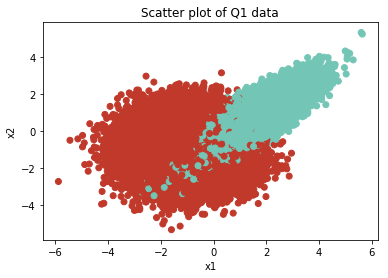

It looks like the dataset is not completely linearly separable. But there's still a clear linear pattern. Therefore, a linear model may be good enough to perform the separation task. 


In [555]:
#Part(E)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
data=pd.read_csv("./data/A3_Q1_data.csv")

colors=['#73C6B6', '#C0392B']
fig = plt.figure()
plt.scatter(y=data.loc[:,'x2'],x=data.loc[:,'x1'],c=data.loc[:,'y'],cmap=matplotlib.colors.ListedColormap(colors))
#plt.legend(data.loc['class1','class0'])
plt.title("Scatter plot of Q1 data")
plt.xlabel('x1')
plt.ylabel('x2')
print("Part(E)")
plt.show()
print("It looks like the dataset is not completely linearly separable. But there's still a clear linear pattern. Therefore, a linear model may be good enough to perform the separation task. ")


In [559]:
print("Part F")
print("Based on the tables below, there is no missing value in the dataset. The scales of x1 and x2 are also very identical. Therefore, I don't think standardization or normalization should be applied.")
print("Number of missing values in the dataset by column")
print(data.isnull().sum())
print(data.describe())


Part F
Based on the tables below, there is no missing value in the dataset. The scales of x1 and x2 are also very identical. Therefore, I don't think standardization or normalization should be applied.
Number of missing values in the dataset by column
x1    0
x2    0
y     0
dtype: int64
                  x1             x2              y
count  100000.000000  100000.000000  100000.000000
mean        0.048529      -0.397106       0.500000
std         1.452409       1.164015       0.500003
min        -5.886436      -5.352265       0.000000
25%        -1.041007      -1.206343       0.000000
50%         0.039551      -0.401099       0.500000
75%         1.143536       0.402899       1.000000
max         5.634476       5.317718       1.000000


In [ ]:
print("Part G")


def sigmoid(x):
    return 1./(1 + np.exp(-1*x))

## 2

### [20 points] Digits classification

**(a)** Construct your dataset from the [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits, which has a training set of 60,000 examples, and a test set of 10,000 examples. The digits have been size-normalized and centered in a fixed-size image.

Your goal is to determine whether or not an example is a 3, therefore your binary classifier will seek to estimate $y=1$ if the digit is a 3, and $y=0$ otherwise. Create your dataset by transforming your labels into a binary format. 

**(b)** Plot 10 examples of each class 0 and 1, from the training dataset.

**(c)** How many examples are present in each class? Are the classes balanced? What issues might this cause?

**(d)** Using cross-validation, train and test a classifier. Compare your performance against (1) a classifier that randomly guesses the class, and (2) a classifier that guesses that all examples are NOT 3's. Plot corresponding ROC curves and precision-recall curves. Describe the algorithm's performance and explain any discrepancies you find.

**(f)** Using a logistic regression classifier (a linear classifier), apply lasso regularization and retrain the model and evaluate its performance over a range of values on the regularization coefficient. You can implement this using the [LogisticRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html) module (DO NOT use your function from question 1) and activating the 'l1' penalty; the parameter $C$ is the inverse of the regularization strength. As you vary the regularization coefficient, plot (1) the number of model parameters that are estimated to be nonzero; (2) the logistic regression cost function, which you created a function to evaluate in the Question 1; (3) $F_1$-score, and (4) area under the curve (AUC). Describe the implications of your findings.

**ANSWER**

In [560]:
import tensorflow as tf
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

ImportError: Traceback (most recent call last):
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "/anaconda3/lib/python3.6/site-packages/tensorflow/python/pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "/anaconda3/lib/python3.6/imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "/anaconda3/lib/python3.6/imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: dlopen(/anaconda3/lib/python3.6/site-packages/tensorflow/python/_pywrap_tensorflow_internal.so, 6): Symbol not found: _clock_gettime
  Referenced from: /anaconda3/lib/python3.6/site-packages/tensorflow/python/../libtensorflow_framework.so (which was built for Mac OS X 10.12)
  Expected in: /usr/lib/libSystem.B.dylib
 in /anaconda3/lib/python3.6/site-packages/tensorflow/python/../libtensorflow_framework.so


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

## 3

### [40 points] Supervised learning exploration

For this exercise, you will construct and implement a supervised learning problem solution/experiment. Describe your process and answer these questions clearly and thoroughly. Part of the grade in this assignment is devoted to the quality and professionalism of your work.

**(a)** Identify a question or problem that's of interest to you and that could be addressed using classification or regression. Explain why it's interesting and what you'd like to accomplish. This should exhibit creativity, and you are not allowed to use the Iris dataset, the Kaggle Titanic dataset, or the Kaggle chocolate dataset.

**(b)** Download the data and plot the data to describe it.

**(c)** Formulate your supervised learning question: (a) What is your target variable (what are you trying to predict) and what predictors do you have available? 
v Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)? 

**(d)** What supervised learning technique will you use and why? 

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or $R^2$ for regression)?

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to describe this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.

**ANSWER**

In [455]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import sklearn

In [456]:
col_names=['age','workclass','fnlwgt','education','education_num','marital_status','occupation','relationship',
           'race','sex','capital_gain','capital_loss','hours_per_week','native_country','class_']

train = pd.read_csv("adult.data.txt",sep=',',header=None, names=col_names)
test = pd.read_csv("adult.test.txt",sep=',',skiprows=1,header=None,names=col_names)

## Data Pre-processing

In [457]:
#http://mlr.cs.umass.edu/ml/machine-learning-databases/adult/
train['workclass'] = train.workclass.astype('category')
train['education'] = train.education.astype('category')
train['marital_status'] = train.marital_status.astype('category')
train['occupation'] = train.occupation.astype('category')
train['relationship'] = train.relationship.astype('category')
train['race'] = train.race.astype('category')
train['sex'] = train.sex.astype('category')
train['native_country'] = train.native_country.astype('category')
train['class_'] = train.class_.astype('category')

train.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [458]:
#Checking for missing values
train.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
class_            0
dtype: int64

In [459]:
test.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
class_            0
dtype: int64

In [460]:
train_dropna=train.dropna(axis=0)
train_dropna.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [461]:
train.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [462]:
test_dropna=test.dropna(axis=0)
test_dropna.describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,16281.000000,1.628100e+04,16281.000000,16281.000000,16281.000000,16281.000000
mean,38.767459,1.894357e+05,10.072907,1081.905104,87.899269,40.392236
std,13.849187,1.057149e+05,2.567545,7583.935968,403.105286,12.479332
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.167360e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.778310e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.383840e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,3770.000000,99.000000


In [463]:
train=train_dropna
test=test_dropna

## Exploratory Data Analysis

In [464]:
def EDA_boxplot(res,pred):
    dat=train.loc[:,[res,pred]]
    sns.boxplot(x=dat[res],y=dat[pred]).set_title(str(res)+"(response) versus "+str(pred)+" (predictor)")
    plt.show()

/anaconda3/lib/python3.6/site-packages/seaborn/categorical.py:462: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


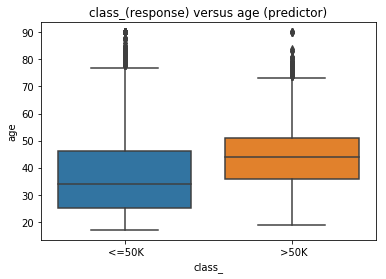

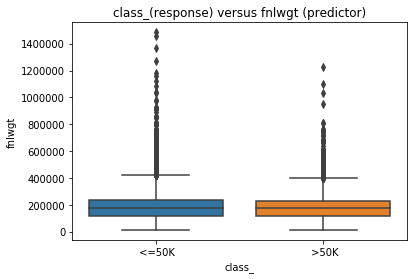

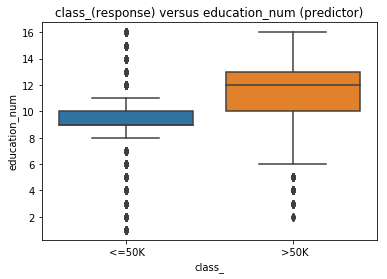

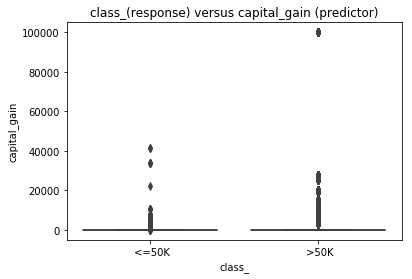

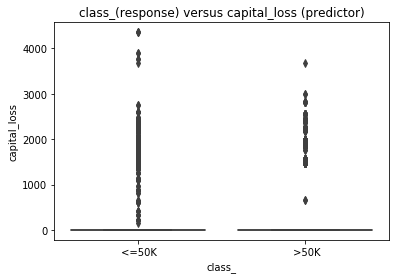

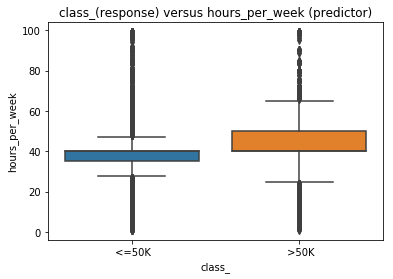

In [465]:
EDA_boxplot('class_','age')
EDA_boxplot('class_','fnlwgt')
EDA_boxplot('class_','education_num')
EDA_boxplot('class_','capital_gain')
EDA_boxplot('class_','capital_loss')
EDA_boxplot('class_','hours_per_week')

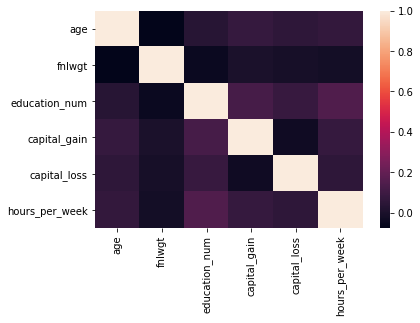

In [466]:
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.show()

In [467]:
print(type(train))
c=train.corr().abs()
s=c.unstack()
so=s.sort_values(kind="quicksort")
print(so)

<class 'pandas.core.frame.DataFrame'>
capital_gain    fnlwgt            0.000432
fnlwgt          capital_gain      0.000432
capital_loss    fnlwgt            0.010252
fnlwgt          capital_loss      0.010252
hours_per_week  fnlwgt            0.018768
fnlwgt          hours_per_week    0.018768
capital_loss    capital_gain      0.031615
capital_gain    capital_loss      0.031615
age             education_num     0.036527
education_num   age               0.036527
                fnlwgt            0.043195
fnlwgt          education_num     0.043195
capital_loss    hours_per_week    0.054256
hours_per_week  capital_loss      0.054256
capital_loss    age               0.057775
age             capital_loss      0.057775
                hours_per_week    0.068756
hours_per_week  age               0.068756
fnlwgt          age               0.076646
age             fnlwgt            0.076646
capital_gain    age               0.077674
age             capital_gain      0.077674
capital_gain    

**(c)** Formulate your supervised learning question: 
<br>What is your target variable (what are you trying to predict) and 
<br>what predictors do you have available? 
<br>Does your dataset require any preprocessing: is it clean (no missing values or erroneous data) and normalized (are each of the predictors of the same magnitude)?

**ANS**
<br>(1) My target variable is "class_", which indicates whether the observation makes >50k or <=50k. 
<br>(2)The predictor available and their definitions are as below:
 - **age**: the age of an individual
 - **workclass**: a general term to represent the employment status of an individual
 - **fnlwgt**: final weight
 - **education**: the highest level of education achieved by an individual
 - **education_num**: the highest level of education achieved in numerical form
 - **marital_status**: marital status of an individual
 - **occupation**: the general type of occupation of an individual
 - **relationship**: represents what this individual is relative to others
 - **race**: Descriptions of an individual’s race
 - **sex**: the biological sex of the individual
 - **capital_gain**: capital gains for an individual
 - **capital_loss**: capital loss for an individual
 - **hours_per_week**: the hours an individual has reported to work per week
 - **native_country**: country of origin for an individual
 - **class_**: whether or not an individual makes more than $50,000 annually.

<br>(3) The dataset comes with a training set and a test set. There are some missing values in the test set across different columns. As the magnitudes of predictors are different, the normalization process should be included in the data pre-processing part. 

In [468]:
#Standardize data - numerical columns
norm_data = train.loc[:,['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']].values
scaler = StandardScaler().fit(norm_data)
rescaledX = scaler.transform(norm_data)
scaled_train = pd.DataFrame(rescaledX,columns=['age','fnlwgt','education_num','capital_gain','capital_loss',
                                               'hours_per_week'])

#Combine numerical and categorical columns
cate_df = train.loc[:,['workclass','education','marital_status','occupation','relationship','race','sex',
                       'native_country']]
cate_df.reset_index(drop=True, inplace=True)
scaled_train.reset_index(drop=True, inplace=True)
train_norm=pd.concat([scaled_train,cate_df],axis=1)
train_norm.head()

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba


In [469]:
#Create dummy variables for categorical variables
train_dum = pd.get_dummies(train_norm, prefix='C_', columns=['workclass'])
train_dum = pd.get_dummies(train_dum, prefix='C_', columns=['education'])
train_dum = pd.get_dummies(train_dum, prefix='C_', columns=['marital_status'])
train_dum = pd.get_dummies(train_dum, prefix='C_', columns=['occupation'])
train_dum = pd.get_dummies(train_dum, prefix='C_', columns=['relationship'])
train_dum = pd.get_dummies(train_dum, prefix='C_', columns=['race'])
train_dum = pd.get_dummies(train_dum, prefix='C_', columns=['sex'])
train_dum = pd.get_dummies(train_dum, prefix='C_', columns=['native_country'])

In [470]:
Y_train=train.loc[:,'class_']
Y_train=Y_train.replace(to_replace=' >50K',value=1)
Y_train=Y_train.replace(to_replace=' <=50K',value=0)

X_train=train_dum
X_train.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,C__ ?,C__ Federal-gov,C__ Local-gov,C__ Never-worked,...,C__ Portugal,C__ Puerto-Rico,C__ Scotland,C__ South,C__ Taiwan,C__ Thailand,C__ Trinadad&Tobago,C__ United-States,C__ Vietnam,C__ Yugoslavia
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**(d)** What supervised learning technique will you use and why? 
<br> As the target variable is binary, I consider the following methods: Logistic Regression, LDA and KNN.

**(e)** How will you evaluate performance and know whether you succeeded (e.g. ROC curves for binary classification, mean square error or  R2R2  for regression)?
<br>

**(f)** Divide your dataset into training and testing datasets OR implement cross validation. Explain your approach and why you adopted it.
<br>

**(g)** Run your analysis and show your performance. Include plots of your data and of performance.
<br>

**(h)** Describe how your system performed, where your supervised learning algorithm performed well, and where it did not, and how you could improve it.
<br>

**(i)** Write a brief summary / elevator pitch for this work that you would put on LinkedIn to describe this project to future employers. This should focus on the high level impact and importance and overall takeaways and not on the nitty-gritty details.
<br>

In [471]:
#Fit a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg=logreg.fit(X_train,Y_train)
logreg_score = logreg.score(X_train,Y_train)
print("Accuracy rate: "+ str(logreg_score))

Accuracy rate: 0.853075765486318


In [472]:
print(logreg)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)


In [522]:
Y_pred_proba = logreg.predict_proba(X_train)[::,1]
pred_train=logreg.predict(X_train)
fpr, tpr, _ = sklearn.metrics.roc_curve(Y_train,Y_pred_proba)
roc_auc = sklearn.metrics.auc(fpr, tpr)
sklearn.metrics.accuracy_score(Y_train, pred_train)

0.853075765486318

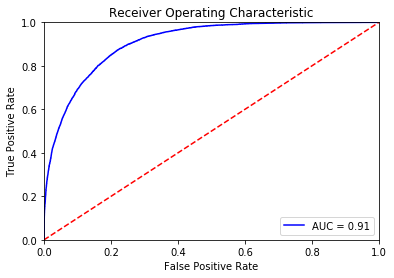

Accuracy rate:  0.853075765486318


In [477]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("Accuracy rate: ",str(logreg.score(X_train,Y_train)))

## Model Evaluation with a Validation Set

I conducted 10-fold cross-validation and the results show that the accuracy steadily scatter around 84.8%.

In [478]:
import sklearn.cross_validation
scores = sklearn.cross_validation.cross_val_score(LogisticRegression(), X_train, Y_train, scoring='accuracy', cv=10)
print(scores)
print(scores.mean())

[0.84863371 0.8507371  0.85565111 0.84152334 0.8519656  0.85227273
 0.85288698 0.85933661 0.85472973 0.84981572]
0.8517552630923833


## Test on the Test Set

In [479]:
#Standardize the test set
test_std = test.loc[:,['age','fnlwgt','education_num','capital_gain','capital_loss','hours_per_week']].values
rescaled_test_X = scaler.transform(test_std)
scaled_test = pd.DataFrame(rescaled_test_X,columns=['age','fnlwgt','education_num','capital_gain','capital_loss',
                                               'hours_per_week'])

#Combine numerical and categorical columns
cate_df_test = test.loc[:,['workclass','education','marital_status','occupation','relationship','race','sex',
                       'native_country']]
cate_df_test.reset_index(drop=True, inplace=True)
scaled_test.reset_index(drop=True, inplace=True)
test_std=pd.concat([scaled_test,cate_df_test],axis=1)
test_std.head()


/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,-0.995706,0.350774,-1.197459,-0.145920,-0.21666,-0.035429,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States
1,-0.042642,-0.947095,-0.420060,-0.145920,-0.21666,0.774468,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States
2,-0.775768,1.394362,0.746039,-0.145920,-0.21666,-0.035429,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States
3,0.397233,-0.279070,-0.031360,0.895083,-0.21666,-0.035429,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States
4,-1.508894,-0.817458,-0.031360,-0.145920,-0.21666,-0.845327,?,Some-college,Never-married,?,Own-child,White,Female,United-States


In [480]:
test_dum = pd.get_dummies(test_std, prefix='C_', columns=['workclass'])
test_dum = pd.get_dummies(test_dum, prefix='C_', columns=['education'])
test_dum = pd.get_dummies(test_dum, prefix='C_', columns=['marital_status'])
test_dum = pd.get_dummies(test_dum, prefix='C_', columns=['occupation'])
test_dum = pd.get_dummies(test_dum, prefix='C_', columns=['relationship'])
test_dum = pd.get_dummies(test_dum, prefix='C_', columns=['race'])
test_dum = pd.get_dummies(test_dum, prefix='C_', columns=['sex'])
test_dum = pd.get_dummies(test_dum, prefix='C_', columns=['native_country'])

In [515]:
Y_test=test.loc[:,'class_']
Y_test=Y_test.replace(to_replace=' >50K.',value=1)
Y_test=Y_test.replace(to_replace=' <=50K.',value=0)
X_test = test_dum

In [516]:
#As there is no observation that has a C__ Holand-Netherlands value, the test set dataframe doesn't have this column,
#Therefore, I should add this column back to the test set to make sure the format is the same as training set

idx=X_train.columns.get_loc("C__ Holand-Netherlands")
X_test.insert(loc=idx, column="C__ Holand-Netherlands", value=0)


ValueError: cannot insert C__ Holand-Netherlands, already exists

In [517]:
pred_test = logreg.predict(X_test)
probs=logreg.predict_proba(X_test)

In [518]:
sklearn.metrics.accuracy_score(Y_test, pred_test)
#sklearn.metrics.roc_auc_score(Y_test, probs[:, 1])

0.8530188563356059

In [526]:
print(sklearn.metrics.confusion_matrix(Y_test, pred_test))
print(sklearn.metrics.classification_report(Y_test, pred_test))

[[11583   852]
 [ 1541  2305]]
             precision    recall  f1-score   support

          0       0.88      0.93      0.91     12435
          1       0.73      0.60      0.66      3846

avg / total       0.85      0.85      0.85     16281



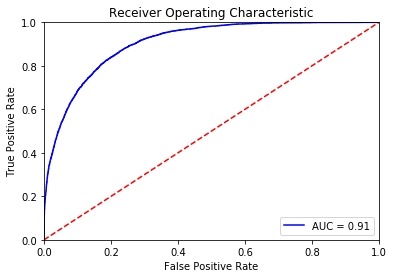

Accuracy rate:  0.853075765486318


In [527]:
Y_pred_proba = logreg.predict_proba(X_test)[::,1]
pred_train=logreg.predict(X_test)
fpr, tpr, _ = sklearn.metrics.roc_curve(Y_test,Y_pred_proba)
roc_auc = sklearn.metrics.auc(fpr, tpr)
sklearn.metrics.accuracy_score(Y_test, pred_train)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
print("Accuracy rate: ",str(logreg.score(X_train,Y_train)))